In [ ]:

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# 用pandas来导入数据，并进行预处理
data=pd.read_csv('winequality-red.csv',sep=';')
X_pd=data.iloc[:,:-1]
y_pd=data.iloc[:,-1]

y=np.array(y_pd)
X=np.array(X_pd)
wineNames=np.array(data.columns)


#将数据分割成训练集和测试集
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=531)

#用不同的集成大小（决策树的树目）来训练数据，并记录其均方误差
mseOos = []
nTreeList = range(50, 500, 10)
for iTrees in nTreeList:
    depth = None
    maxFeat  = 4 #try tweaking
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees, max_depth=depth, max_features=maxFeat,
                                                 oob_score=False, random_state=531)

    wineRFModel.fit(xTrain,yTrain)

    #Accumulate mse on test set
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))


print("MSE" )
print(mseOos[-1])


#画出以均方误差与集成大小的关系的折线图
plt.rc('font', family='SimHei', size=13)
plt.plot(nTreeList, mseOos)
plt.xlabel('集成方法中决策树的数目')
plt.ylabel('均方误差')
plt.show()
# 画出特征重要程度的直方图
featureImportance = wineRFModel.feature_importances_

# 标准化各特征的重要程度
featureImportance = featureImportance / featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, wineNames[sorted_idx])
plt.xlabel('变量重要程度')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()
#printed output
#MSE
#0.314125711509

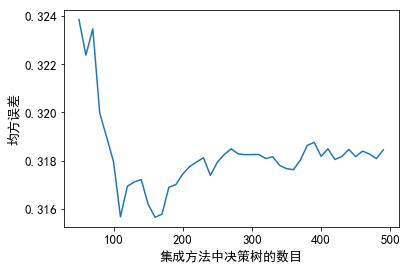

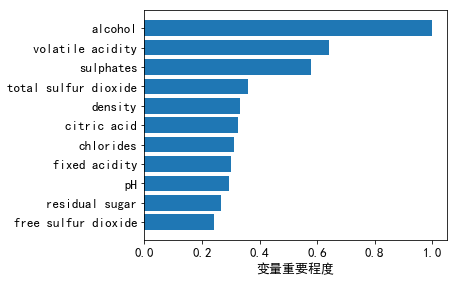

In [11]:
plt.rc('font', family='SimHei', size=13)
plt.plot(nTreeList, mseOos)
plt.xlabel('集成方法中决策树的数目')
plt.ylabel('均方误差')
plt.show()

barPos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, wineNames[sorted_idx])
plt.xlabel('变量重要程度')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)


In [ ]:
fig,ax=plt.subplot(2)
